In [2]:
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from photutils import CircularAperture, aperture_photometry, CircularAnnulus, DAOStarFinder
import astropy.io.fits as pf
import numpy as np
import seaborn as sns
sns.set()
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.wcs import WCS
from matplotlib import pyplot as plt
import os
from scipy import stats

In [19]:
np.shape(Vbinnedmasterflat)

(2056, 2048)

In [44]:
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project')

Vbinnedmasterflat = pf.open('Vbinnedmasterflat.fits')
Vbinnedmasterflat = Vbinnedmasterflat[0].data

Vnonbinnedmasterflat = pf.open('Vnonbinnedmasterflat.fits')
Vnonbinnedmasterflat = Vnonbinnedmasterflat[0].data

Ibinnedmasterflat = pf.open('Ibinnedmasterflat.fits')
Ibinnedmasterflat = Ibinnedmasterflat[0].data

Inonbinnedmasterflat = pf.open('Inonbinnedmasterflat.fits')
Inonbinnedmasterflat = Inonbinnedmasterflat[0].data

nonbinnedmasterbias = np.full((1500,1500),731.4574042626265)
binnedmasterbias = np.full((750,750),731.4574042626265)

directory = (r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid3\V')
Vimages = []
Vfiles = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        os.chdir(directory)
        image=pf.getdata(file)
        Vimages.append(image)
        Vfiles.append(file)
    else:
        continue
Vbinned = []
for file,image in zip(Vfiles,Vimages):
    if np.shape(image) == (2056, 2048):
        Vbinned.append(file)
Vnonbinned = []
for file,image in zip(Vfiles,Vimages):
    if np.shape(image) == (4112, 4096):
        Vnonbinned.append(file)
        
directory = (r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid3\I')
Iimages = []
Ifiles = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        os.chdir(directory)
        image=pf.getdata(file)
        Iimages.append(image)
        Ifiles.append(file)
    else:
        continue
Ibinned = []
for file,image in zip(Ifiles,Iimages):
    if np.shape(image) == (2056, 2048):
        Ibinned.append(file)
Inonbinned = []
for file,image in zip(Ifiles,Iimages):
    if np.shape(image) == (4112, 4096):
        Inonbinned.append(file)

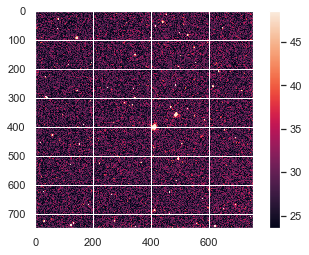

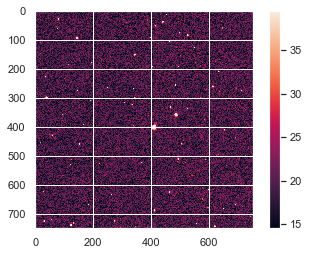

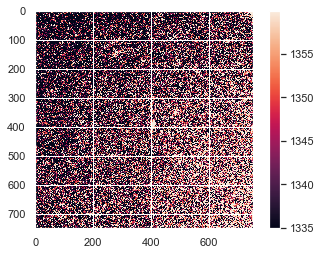

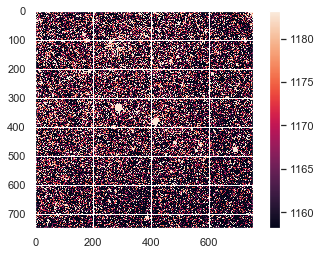

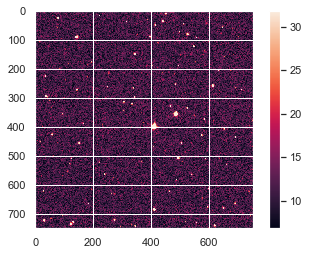

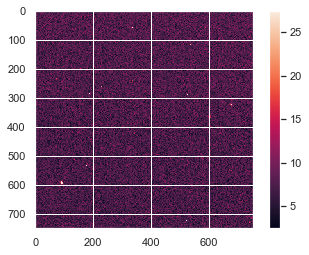

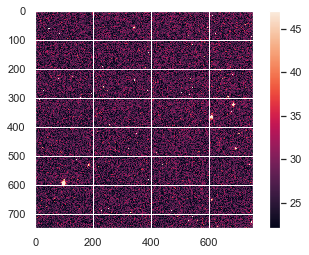

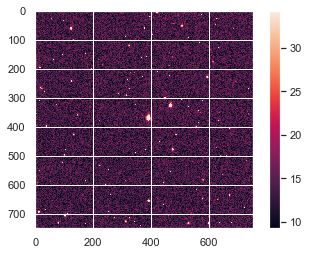

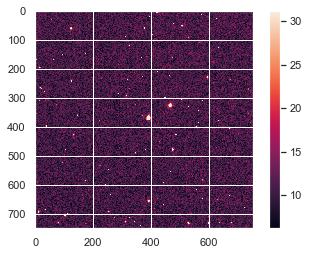

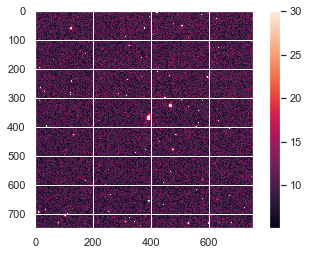

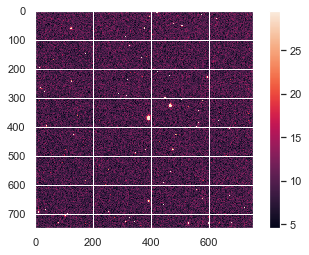

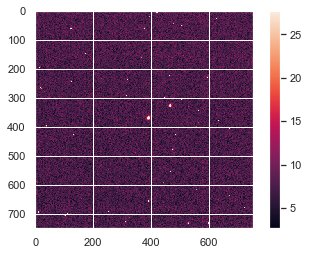

In [45]:
for file in Vbinned:
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid3\V')
    i = pf.getdata(file)
    j = i[625:1375,625:1375]
    k = (j-binnedmasterbias)/Vbinnedmasterflat[625:1375,625:1375]
    x = np.mean(k)-5
    y = np.mean(k)+20
    plt.imshow(k,vmin=x,vmax=y)
    plt.colorbar()
    plt.show()
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\3V Reduced')
    #newheader = pf.PrimaryHDU(k)
    #newheader.writeto('reduced'+file+'.fits', overwrite=True)

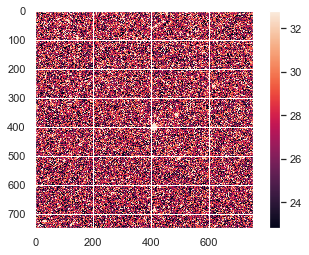

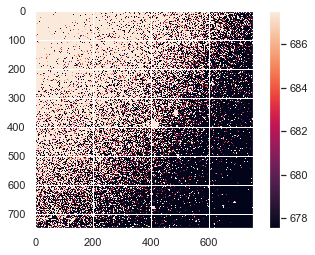

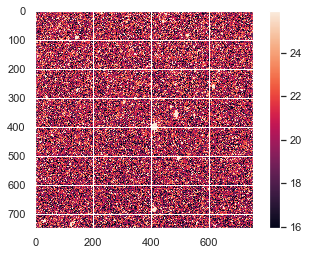

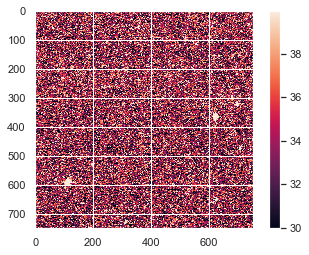

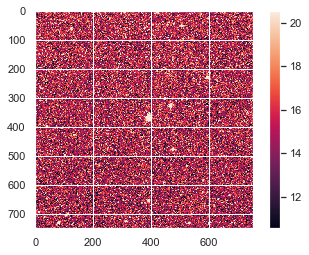

In [47]:
for file in Ibinned:
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid3\I')
    i = pf.getdata(file)
    j = i[625:1375,625:1375]
    k = (j-binnedmasterbias)/Ibinnedmasterflat[625:1375,625:1375]
    x = np.mean(k)-5
    y = np.mean(k)+20
    plt.imshow(k,vmin=x,vmax=y)
    plt.colorbar()
    plt.show()
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\3I Reduced')
    #newheader = pf.PrimaryHDU(k)
    #newheader.writeto('reduced'+file+'.fits', overwrite=True)

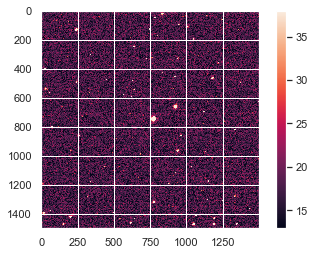

In [56]:
for file in Vnonbinned:
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid3\V')
    i = pf.getdata(file)
    j = i[1250:2750,1250:2750]
    k = (j-nonbinnedmasterbias)/Vnonbinnedmasterflat[1250:2750,1250:2750]
    x = np.mean(k)-5
    y = np.mean(k)+20
    plt.imshow(k,vmin=x,vmax=y)
    plt.colorbar()
    plt.show()
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\3V Reduced')
    #newheader = pf.PrimaryHDU(k)
    #newheader.writeto('reduced'+file+'.fits', overwrite=True)

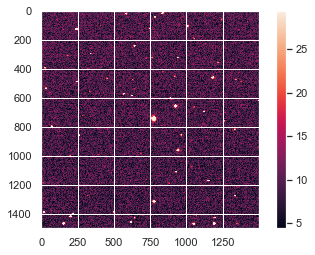

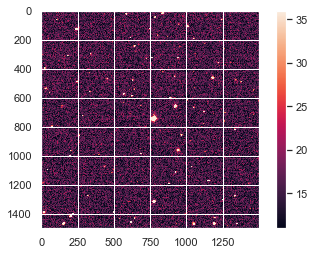

In [57]:
for file in Inonbinned:
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid3\I')
    i = pf.getdata(file)
    j = i[1250:2750,1250:2750]
    k = (j-nonbinnedmasterbias)/Inonbinnedmasterflat[1250:2750,1250:2750]
    x = np.mean(k)-5
    y = np.mean(k)+20
    plt.imshow(k,vmin=x,vmax=y)
    plt.colorbar()
    plt.show()
    os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\3I Reduced')
    #newheader = pf.PrimaryHDU(k)
    #newheader.writeto('reduced'+file+'.fits', overwrite=True)